In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score


In [38]:
df = pd.read_csv(r"C:\Users\John\Downloads\Projects\heart_disease_data.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [39]:
df.shape 

(303, 14)

In [40]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [41]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [42]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [43]:
df.duplicated().sum()

np.int64(1)

In [44]:
df.drop_duplicates(inplace=True)

In [45]:
df['oldpeak'] = df['oldpeak'].astype(int)
df.dtypes

age         int64
sex         int64
cp          int64
trestbps    int64
chol        int64
fbs         int64
restecg     int64
thalach     int64
exang       int64
oldpeak     int64
slope       int64
ca          int64
thal        int64
target      int64
dtype: object

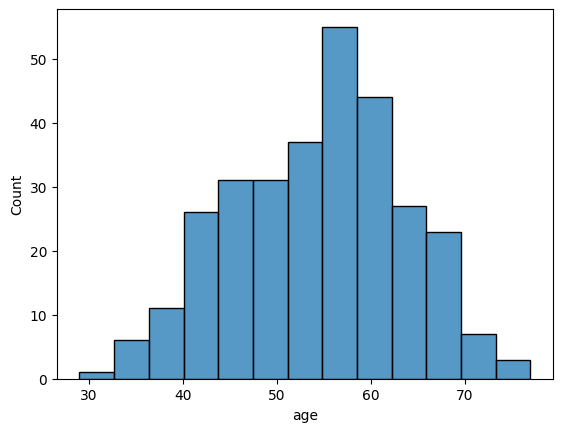

"
  ******************
  ******************
  


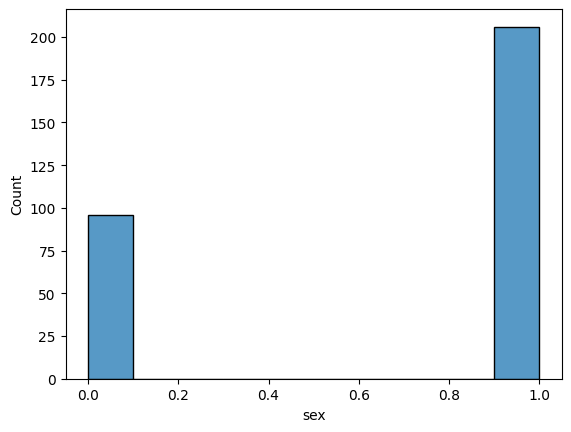

"
  ******************
  ******************
  


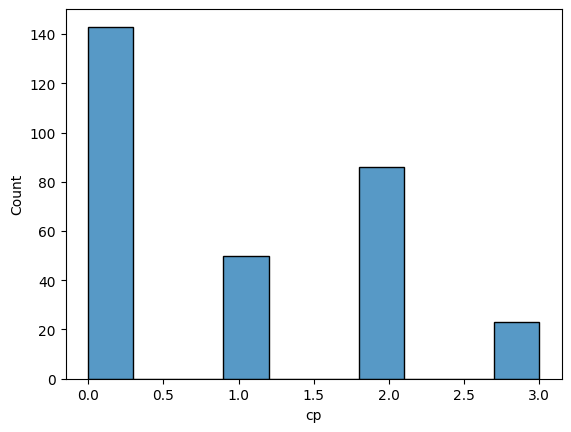

"
  ******************
  ******************
  


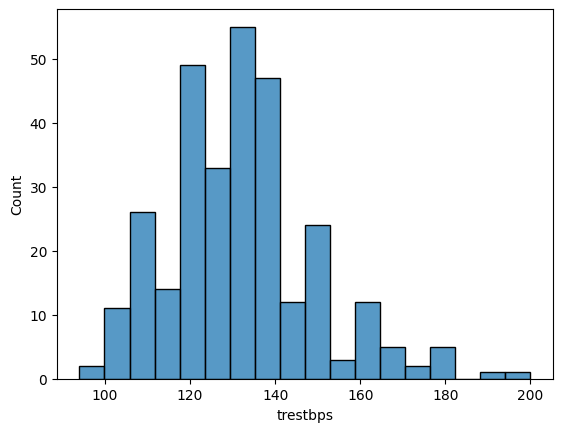

"
  ******************
  ******************
  


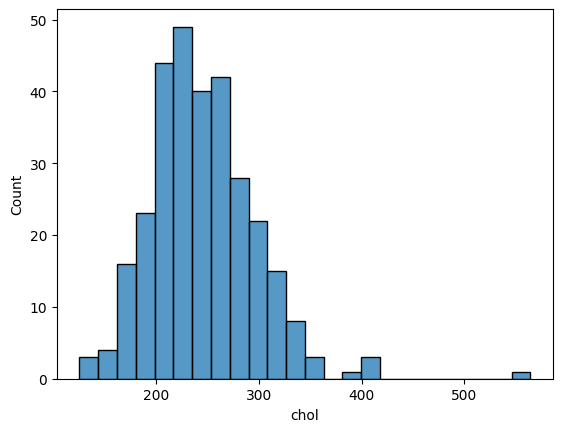

"
  ******************
  ******************
  


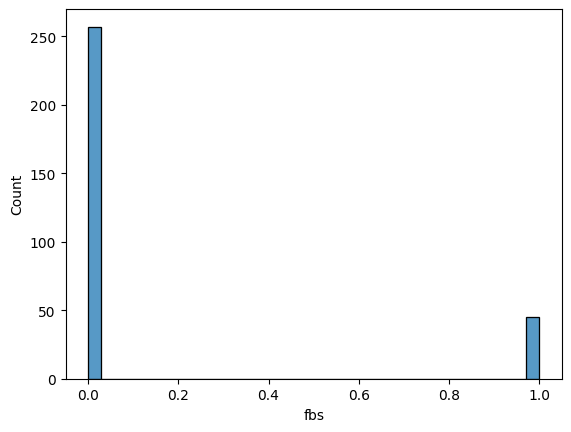

"
  ******************
  ******************
  


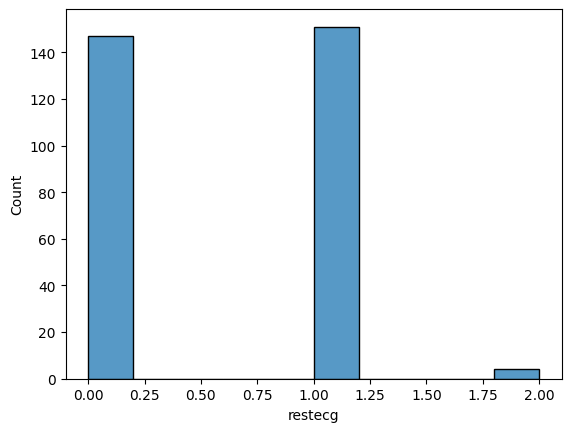

"
  ******************
  ******************
  


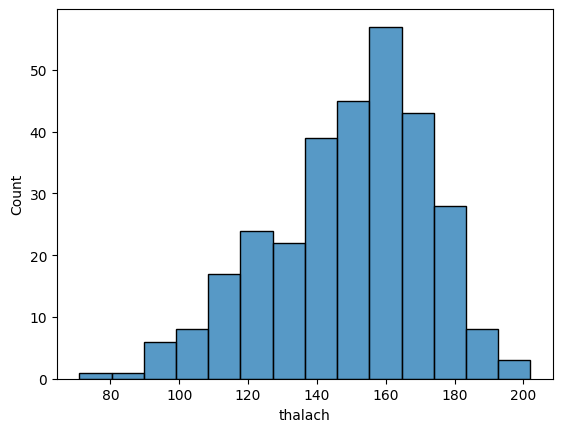

"
  ******************
  ******************
  


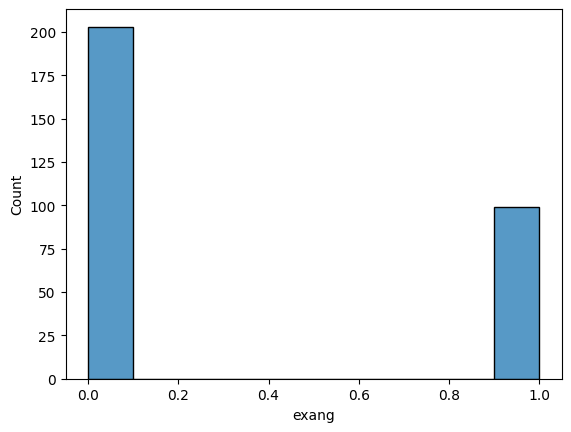

"
  ******************
  ******************
  


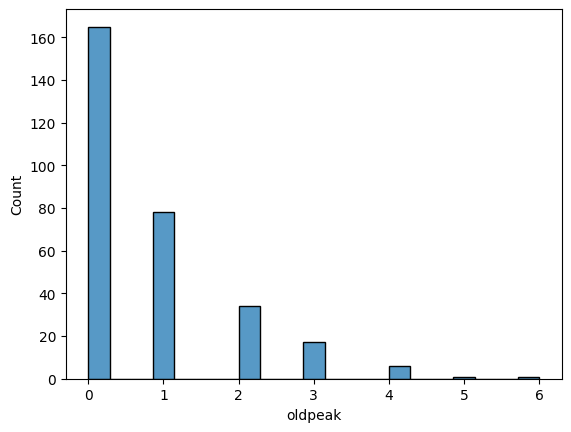

"
  ******************
  ******************
  


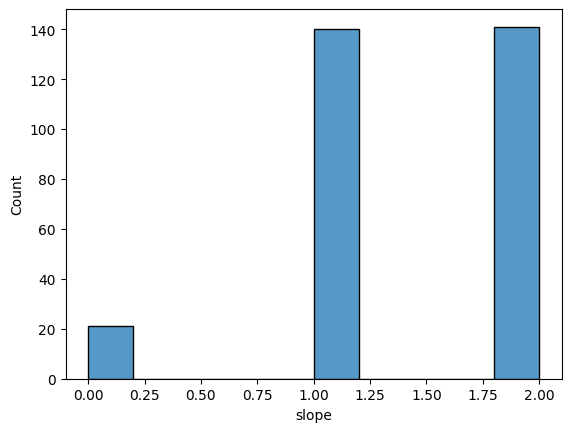

"
  ******************
  ******************
  


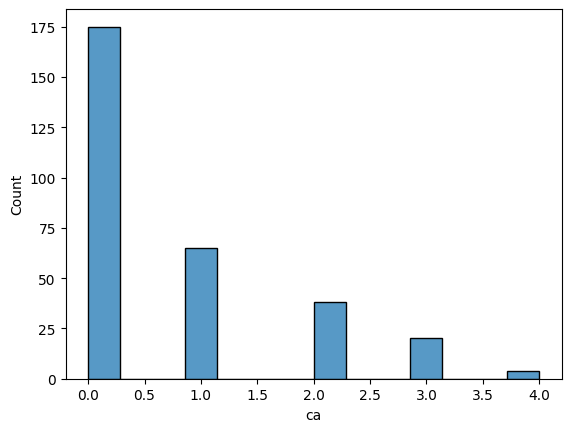

"
  ******************
  ******************
  


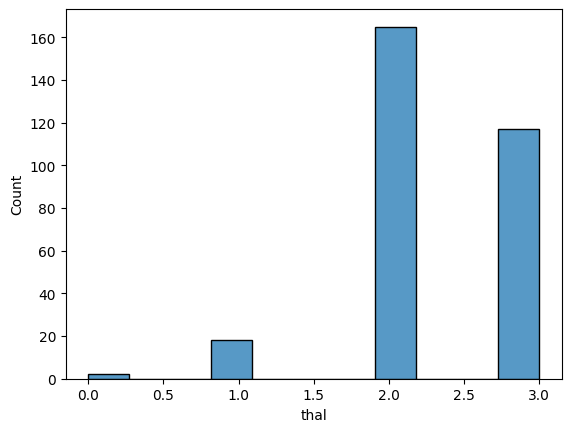

"
  ******************
  ******************
  


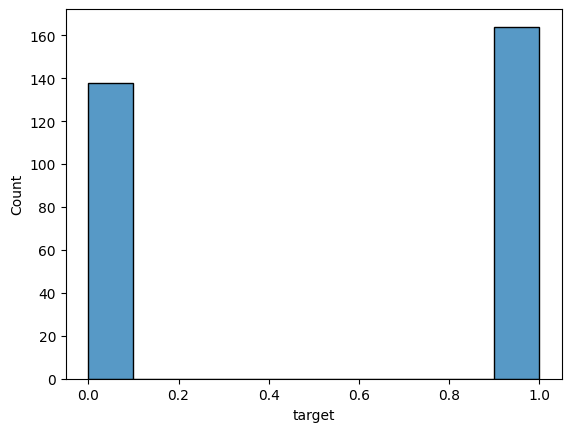

"
  ******************
  ******************
  


In [46]:
for i in df.select_dtypes(include = "number").columns:
  sns.histplot(data=df , x = i)
  plt.show()
  print(""""
  ******************
  ******************
  """)

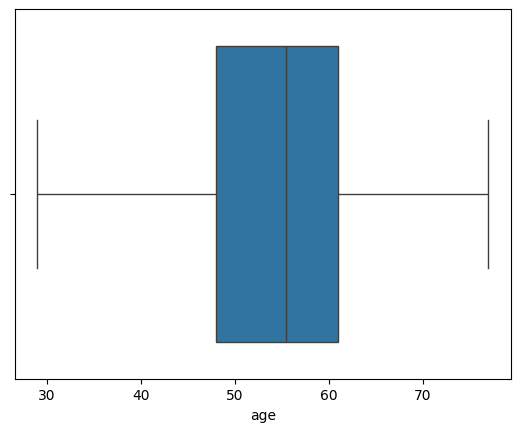

"
  ******************
  ******************
  


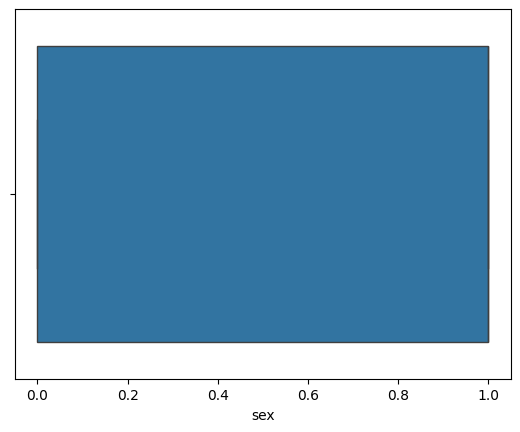

"
  ******************
  ******************
  


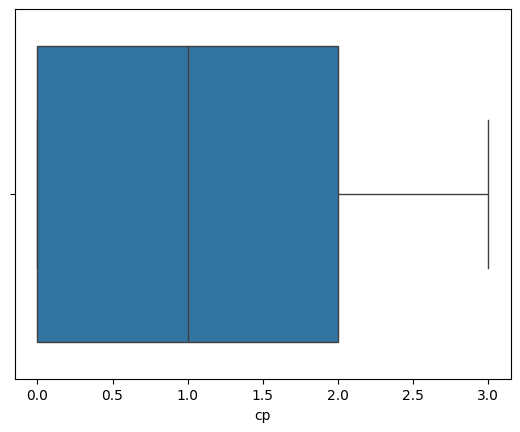

"
  ******************
  ******************
  


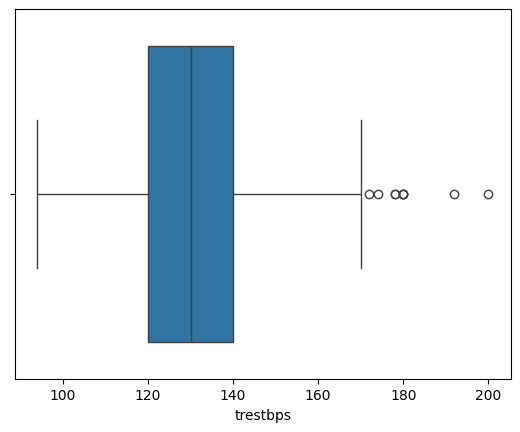

"
  ******************
  ******************
  


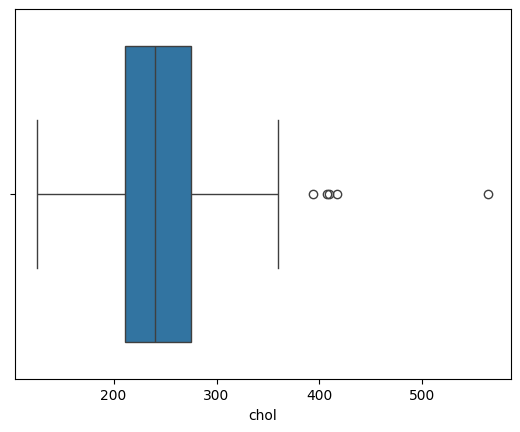

"
  ******************
  ******************
  


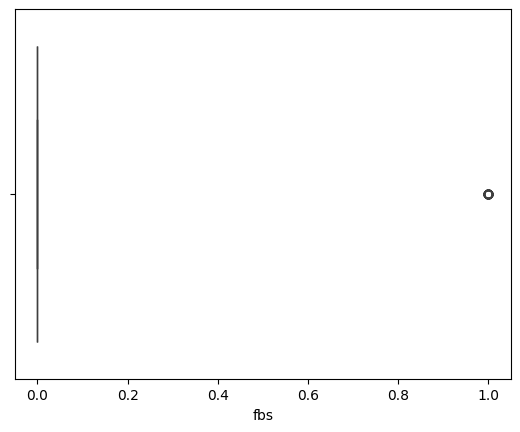

"
  ******************
  ******************
  


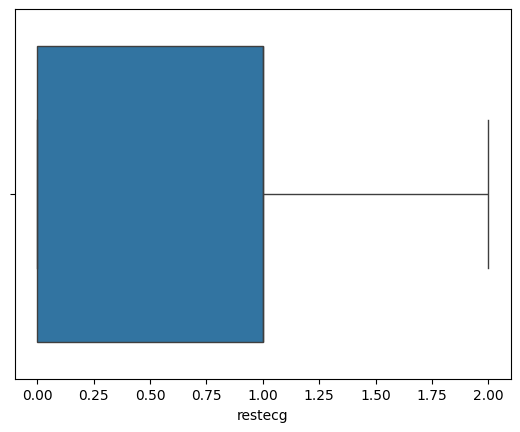

"
  ******************
  ******************
  


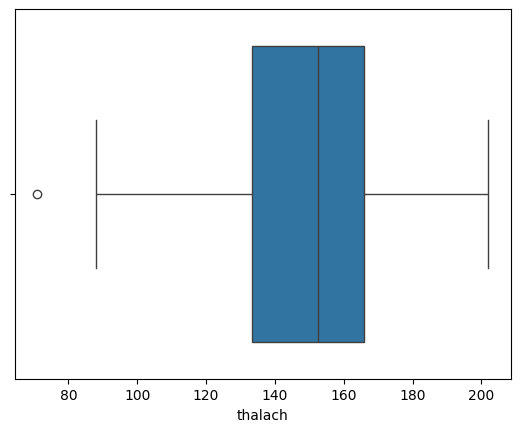

"
  ******************
  ******************
  


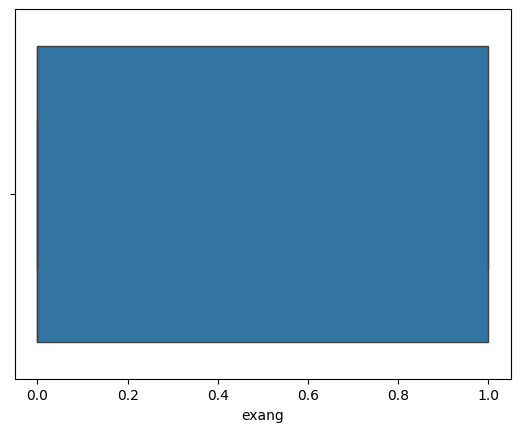

"
  ******************
  ******************
  


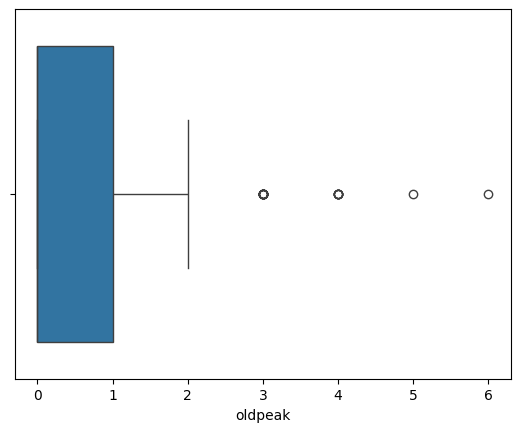

"
  ******************
  ******************
  


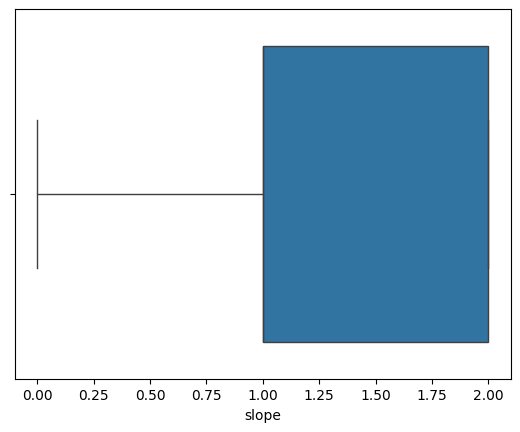

"
  ******************
  ******************
  


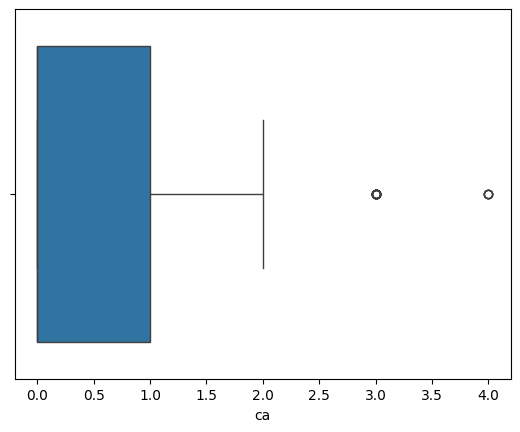

"
  ******************
  ******************
  


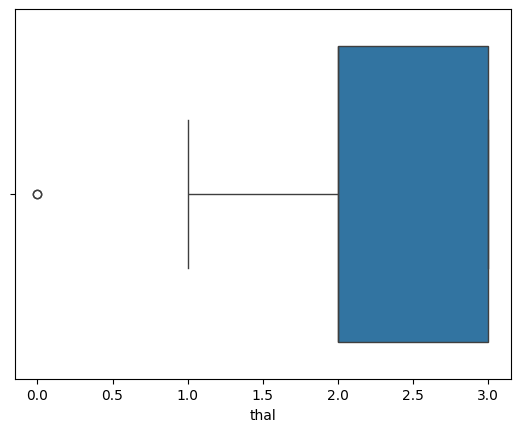

"
  ******************
  ******************
  


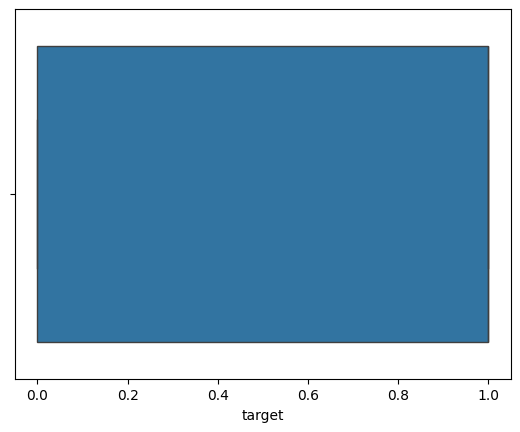

"
  ******************
  ******************
  


In [47]:
for i in df.select_dtypes(include = "number").columns:
  sns.boxplot(data=df , x = i)
  plt.show()
  print(""""
  ******************
  ******************
  """)

In [48]:
for num in df:
    Q1 = df[num].quantile(0.25)
    Q3 = df[num].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    df[num] = df[num].clip(lower, upper)


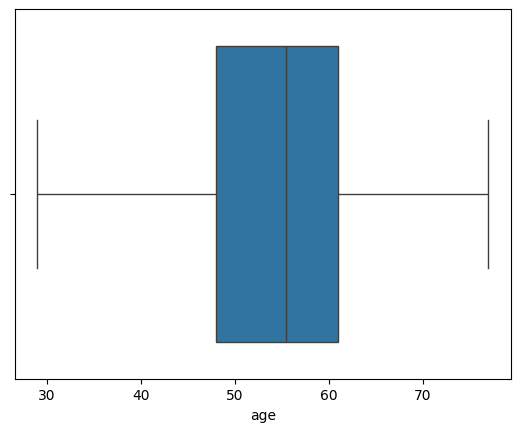

"
  ******************
  ******************
  


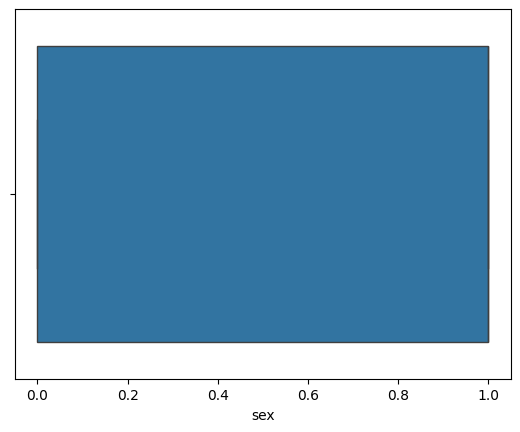

"
  ******************
  ******************
  


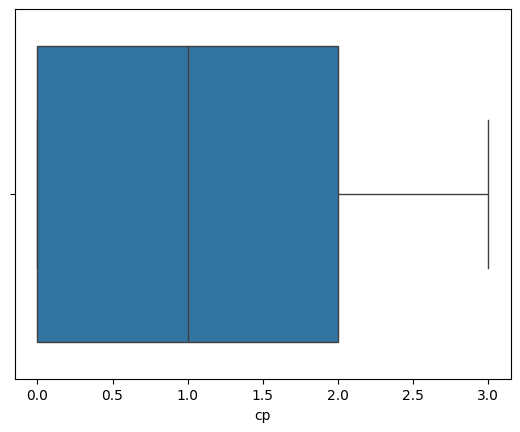

"
  ******************
  ******************
  


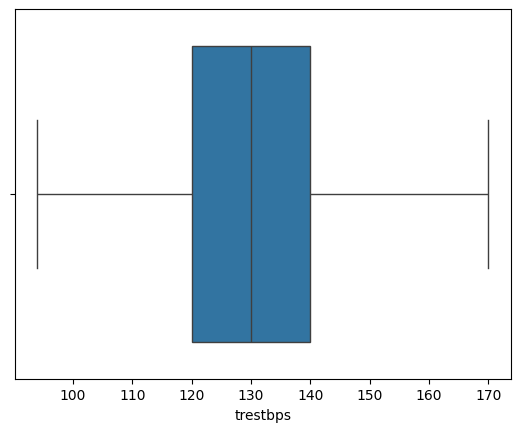

"
  ******************
  ******************
  


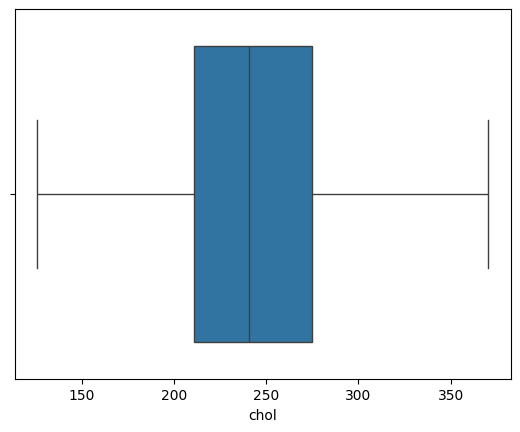

"
  ******************
  ******************
  


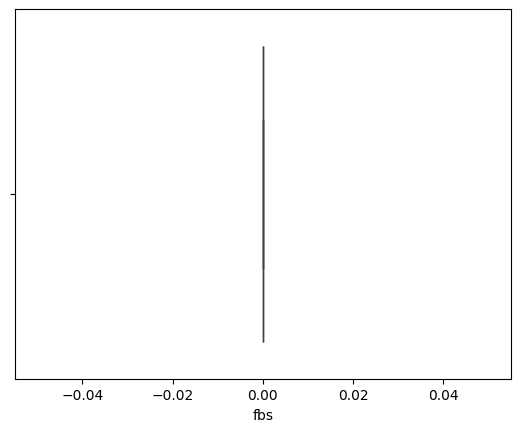

"
  ******************
  ******************
  


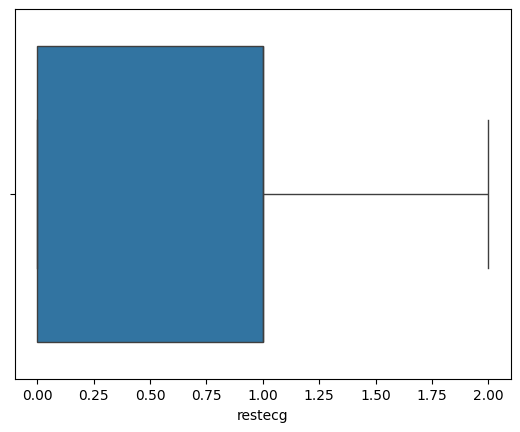

"
  ******************
  ******************
  


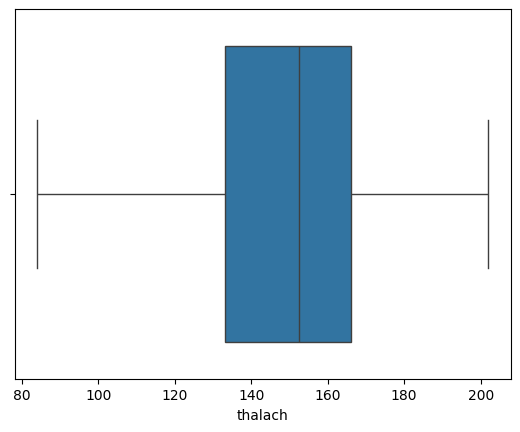

"
  ******************
  ******************
  


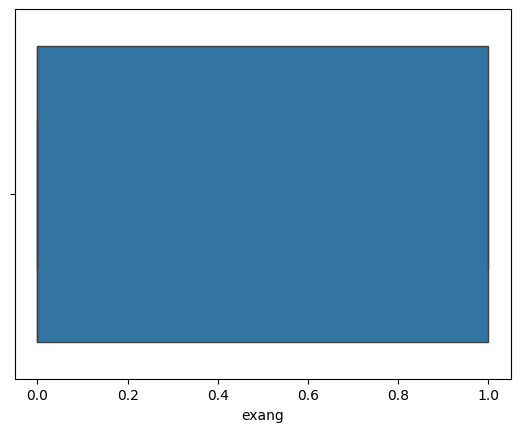

"
  ******************
  ******************
  


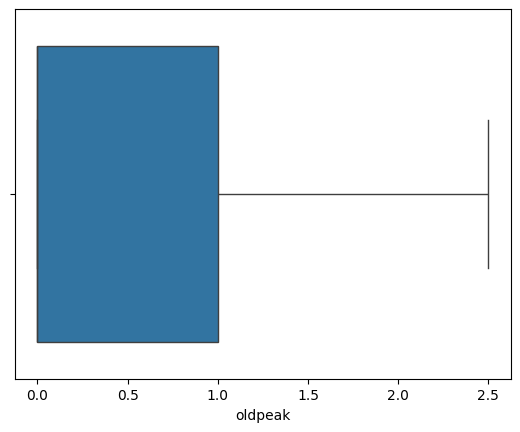

"
  ******************
  ******************
  


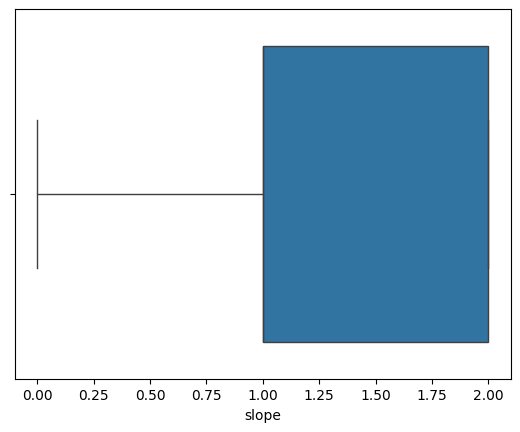

"
  ******************
  ******************
  


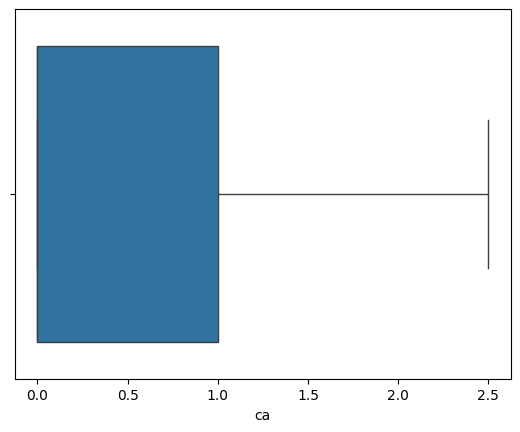

"
  ******************
  ******************
  


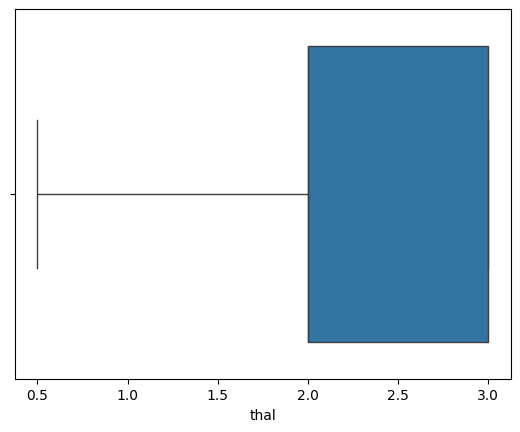

"
  ******************
  ******************
  


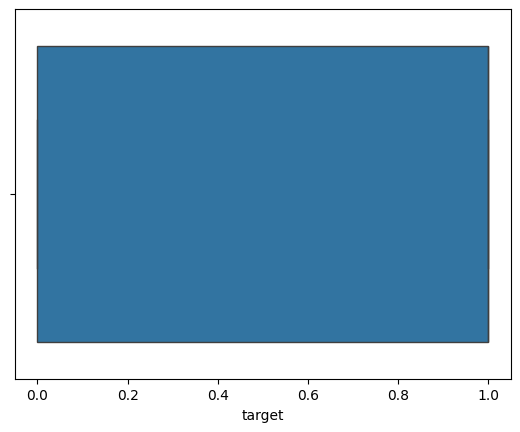

"
  ******************
  ******************
  


In [49]:
for i in df.select_dtypes(include = "number").columns:
  sns.boxplot(data=df , x = i)
  plt.show()
  print(""""
  ******************
  ******************
  """)

In [50]:
df.var()

age           81.865757
sex            0.217553
cp             1.065114
trestbps     275.733735
chol        2254.985097
fbs            0.000000
restecg        0.276705
thalach      518.289982
exang          0.221084
oldpeak        0.751834
slope          0.379794
ca             0.774823
thal           0.362071
target         0.248971
dtype: float64

In [51]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='str')

In [52]:
df[['age','trestbps','chol','thalach']] = np.log1p(df[['age','trestbps','chol','thalach']])

In [53]:
df.var()

age         0.029192
sex         0.217553
cp          1.065114
trestbps    0.015542
chol        0.038028
fbs         0.000000
restecg     0.276705
thalach     0.026036
exang       0.221084
oldpeak     0.751834
slope       0.379794
ca          0.774823
thal        0.362071
target      0.248971
dtype: float64

In [54]:
X = df.drop("target",axis=1)
y = df['target']

In [55]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,4.158883,1,3,4.983607,5.455321,0,0,5.017280,0,2.0,0,0.0,1.0
1,3.637586,1,2,4.875197,5.525453,0,1,5.236442,0,2.5,0,0.0,2.0
2,3.737670,0,1,4.875197,5.323010,0,0,5.153292,0,1.0,2,0.0,2.0
3,4.043051,1,1,4.795791,5.468060,0,1,5.187386,0,0.0,2,0.0,2.0
4,4.060443,0,0,4.795791,5.872118,0,1,5.099866,1,0.0,2,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,4.060443,0,0,4.948760,5.488938,0,1,4.820282,1,0.0,1,0.0,3.0
299,3.828641,1,3,4.709530,5.579730,0,1,4.890349,0,1.0,1,0.0,3.0
300,4.234107,1,0,4.976734,5.267858,0,1,4.955827,0,2.5,1,2.0,3.0
301,4.060443,1,0,4.875197,4.882802,0,1,4.753590,1,1.0,1,1.0,3.0


In [56]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 302, dtype: int64

In [57]:
X_train , X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, stratify = y, random_state = 2)

In [70]:
dt_clf = DecisionTreeClassifier()
xgb = XGBClassifier()
Knn = KNeighborsClassifier(n_neighbors=6)
logreg = LogisticRegression()
svm = SVC()
rf = RandomForestClassifier() 
classifiers = [("Decision Tree CLassifier:",dt_clf),
               ("K Nearset Eighbors:",Knn),
               ("LOgistic Regression:",logreg),
               ("SVC:",svm),
               ("RandomForestClassifier",rf),
               ("XGBClassifier",xgb)]

In [71]:
for clf_name , clf in classifiers:
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    print(clf_name,accuracy_score(y_pred,y_test))

Decision Tree CLassifier: 0.7704918032786885
K Nearset Eighbors: 0.8032786885245902
LOgistic Regression: 0.8524590163934426
SVC: 0.8032786885245902
RandomForestClassifier 0.7868852459016393
XGBClassifier 0.7540983606557377


In [ ]:
vc = VotingClassifier(estimators = classifiers)
vc.fit(X_train,y_train)
y_pred = vc.predict(X_test)

In [ ]:
v_acc = accuracy_score(y_test,y_pred)
print("Voting Classifier Score:", v_acc)


Voting Classifier Score: 0.7704918032786885


In [ ]:
test_accuracy = accuracy_score(y_pred,y_test)
print("Test Accuracy is:",test_accuracy)

Test Accuracy is: 0.7704918032786885


In [ ]:
input_data = (80,0,0,140,50,5,0,160,0,3.6,0,2,4)
input_data_as_numpy_array = np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)
prediction = logreg.predict(input_data_reshaped)
print(prediction)

if prediction[0] == 0:
    print('The Person does not have a Heart Disease')
else:
    print('The Person has Heart Disease')


[1]
The Person has Heart Disease


c:\Users\John\AppData\Local\Python\pythoncore-3.14-64\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
